In [41]:
from PIL import Image
import numpy as np
from pathlib import Path
from einops import reduce
from glob import glob

In [4]:
test_img = Path("deforum-stable-diffusion/output/2022-12/test04/20221212053517_00033.png")
im = Image.open(test_img)

In [6]:
im.thumbnail((1024//8,768//8))

In [14]:
ima = np.asarray(im).astype(np.float32)

In [19]:
ima_mean = reduce(ima, "x y c -> x y", "mean")
ima_max = reduce(ima, "x y c -> x y", "max")

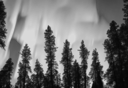

In [32]:
Image.fromarray(np.uint8(0.85*(ima_max + ima_max/ima_mean)))

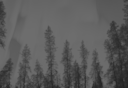

In [40]:
Image.fromarray(np.uint8(20*np.log(0.95*ima_max)))

In [43]:
ims = glob("deforum-stable-diffusion/output/2022-12/test04/20221212053517_000*.png")

In [80]:
centers = []

for j in ims:
    j = Image.open(j)
    j = reduce(np.asarray(j).astype(np.float32), "x y c -> x y", "max")
    centers += [ndi.center_of_mass(j)]

center = reduce(np.array(centers), "n p -> p", "mean")

pd.Series({"from_idx": "null", "to_idx": "null",
                   "cx": center[0], "cy": center[1]}
                     ).to_json("test.json")

In [89]:
import pandas as pd


In [87]:
img_basic

from_idx          null
to_idx            null
cx          305.508679
cy          471.984583
dtype: object

In [79]:
reduce(np.array(centers_mean), "n p -> p", "mean")

array([38.48517122, 58.33758793])

In [66]:
import scipy.ndimage as ndi

In [67]:
img = reduce(i_t, "x y c -> x y", "max")

In [68]:
cy, cx = ndi.center_of_mass(img)

In [69]:
cy, cx

(39.763033513891216, 58.55589762304351)

In [65]:
np.where(i_t == np.amax(i_t))

(array([31, 32, 33, 34, 34, 35, 35, 35, 36, 36, 37, 38, 38, 38, 38, 39, 39,
        39, 39, 40, 40, 40, 40, 41, 42, 43, 44, 44, 44, 45, 45, 45, 45, 46,
        46, 46, 46, 47, 47, 47, 47, 48, 48, 49, 49, 50, 53, 54, 63, 64, 65]),
 array([32, 32, 56, 31, 56, 31, 56, 57, 56, 57, 57, 57, 58, 71, 72, 57, 58,
        71, 72, 57, 58, 71, 72, 58, 58, 58, 28, 29, 58, 28, 29, 58, 59, 29,
        30, 58, 59, 30, 31, 58, 59, 31, 32, 31, 32, 32, 36, 36, 59, 60, 60]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1]))

In [56]:
ims_arr_uni = np.array(ims_arr)

In [57]:
ims_arr_uni_max = reduce(ims_arr_uni, "n x y c -> x y", "mean")

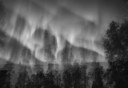

In [58]:
Image.fromarray(np.uint8(ims_arr_uni_max))